# Prediction model on fashion MNIST

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

2024-03-01 12:20:48.422033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Splitting and reshaping the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
# Reshaping data to match the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

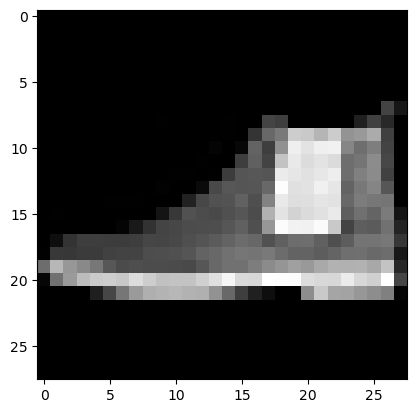

9


In [5]:
plt.imshow(X_train[111], cmap='gray')
plt.show()

print(Y_train[111])

In [6]:
# Labels categorization
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [7]:
# Convert to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Training the model

In [8]:
def my_model():
    model = Sequential()
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
model = my_model()

2024-03-01 12:20:50.887429: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=100)

Epoch 1/5
260/600 [============>.................] - ETA: 21s - loss: 5.2380 - accuracy: 0.7661

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy', test_acc)

## Using the model to make predictions

In [ ]:
# Mapping dict for my future predictions
class_labels = {
    0: {"label": "T-shirt/top"},
    1: {"label": "Trouser"},
    2: {"label": "Pullover"},
    3: {"label": "Dress"},
    4: {"label": "Coat"},
    5: {"label": "Sandal"},
    6: {"label": "Shirt"},
    7: {"label": "Sneaker"},
    8: {"label": "Bag"},
    9: {"label": "Ankle boot"}
}

In [ ]:
# Choose the index of the image to predict on
image_index = 109

# Get the image from X_test
image = X_test[image_index]

# Reshape the image to match the input shape expected by the model
image = image.reshape(1, 28, 28, 1)

# Make the prediction
prediction = model.predict(image)

# Using argmax to return the class with highest probability
predicted_class = np.argmax(prediction)
predicted_label = class_labels[predicted_class]["label"]

In [ ]:
image_to_plot = X_test[image_index].reshape(28, 28)

plt.imshow(image_to_plot, cmap='gray')
plt.show()

print("Predicted class:", predicted_class)
print("Predicted label:", predicted_label)